# Initalization 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir = pathlib.Path(r'\Users\elife\Documents\Jupyter-Notebook\MaskClassification\CMFD') 
count = len(list(data_dir.glob('*/*.jpg')))
print(count)

3815


# Setting up for Training

In [3]:
batch_size = 32
img_height = 1024
img_width = 1024

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3815 files belonging to 4 classes.
Using 3052 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3815 files belonging to 4 classes.
Using 763 files for validation.


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [8]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [9]:
num_classes = 1

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 1024, 1024, 3)     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1024, 1024, 16)    448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 512, 512, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 64)      0

In [11]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
96/96 [==============================] - 1177s 12s/step - loss: 7.0307 - accuracy: 0.2570 - val_loss: 1.4364 - val_accuracy: 0.2320
Epoch 2/10
96/96 [==============================] - 1072s 11s/step - loss: 1.3811 - accuracy: 0.2964 - val_loss: 1.4164 - val_accuracy: 0.2464
Epoch 3/10
96/96 [==============================] - 2991s 31s/step - loss: 1.2315 - accuracy: 0.4648 - val_loss: 1.5741 - val_accuracy: 0.2398
Epoch 4/10
96/96 [==============================] - 1106s 12s/step - loss: 0.6633 - accuracy: 0.7687 - val_loss: 2.2275 - val_accuracy: 0.2425
Epoch 5/10
96/96 [==============================] - 1048s 11s/step - loss: 0.1943 - accuracy: 0.9440 - val_loss: 3.3383 - val_accuracy: 0.2254
Epoch 6/10
96/96 [==============================] - 973s 10s/step - loss: 0.0226 - accuracy: 0.9982 - val_loss: 4.0372 - val_accuracy: 0.2333
Epoch 7/10
96/96 [==============================] - 909s 9s/step - loss: 0.0086 - accuracy: 0.9997 - val_loss: 5.3073 - val_accuracy: 0.2346
Ep

INFO:tensorflow:Assets written to: assets


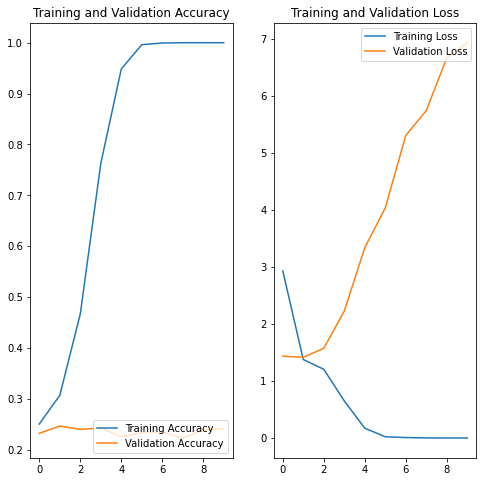

In [12]:
acc = history.history['accuracy']
model.save("")
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()